# Superstore Sales 📊📉🛒

## 1️⃣ Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

## 2️⃣ Read the Dataset 

In [2]:
path = r'Dataset\train.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(9800, 18)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Check Columns

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

#### Remove unnecessary columns

In [7]:
df.drop(columns='Row ID', inplace=True)

#### Fix Date columns

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

### Description

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,9800,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,9800,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00,NaN
Postal Code,9789.0,55273.322403,1040.0,23223.0,58103.0,90008.0,99301.0,32041.223413
Sales,9800.0,230.769059,0.444,17.248,54.49,210.605,22638.48,626.651875


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,9800,4922,CA-2018-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9800,NaN,NaN,NaN,2017-05-01 05:13:51.673469440,2015-01-03 00:00:00,2016-05-24 00:00:00,2017-06-26 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00,NaN
Ship Date,9800,NaN,NaN,NaN,2017-05-05 04:17:52.653061120,2015-01-07 00:00:00,2016-05-27 18:00:00,2017-06-29 00:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00,NaN
Ship Mode,9800,4,Standard Class,5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9800,793,WB-21850,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9800,793,William Brown,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9800,3,Consumer,5101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9800,1,United States,9800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9800,529,New York City,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9800,49,California,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for missing values

In [12]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [14]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### Check duplicate rows

In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates(inplace=True)

### Analysis

#### Total Sales

##### Total Revenue

In [17]:
df['Sales'].sum()

2261255.4107

In [18]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

##### Number of Orders

In [19]:
df['Order ID'].count()

9799

##### Average order value

In [20]:
data = df.groupby('Order ID')['Sales'].sum()
data.head()

Order ID
CA-2015-100006    377.970
CA-2015-100090    699.192
CA-2015-100293     91.056
CA-2015-100328      3.928
CA-2015-100363     21.376
Name: Sales, dtype: float64

In [21]:
data.mean()

459.4180029865908

#### Compare Performance

##### Order rate months over 4 years

In [22]:
monthly_orders = df.resample('M', on='Order Date')['Order ID'].count()
monthly_orders.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\1659929646.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df.resample('M', on='Order Date')['Order ID'].count()


Order Date
2015-01-31     77
2015-02-28     46
2015-03-31    154
2015-04-30    129
2015-05-31    121
Freq: ME, Name: Order ID, dtype: int64

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\1573184651.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df.resample('M', on='Order Date')['Order ID'].count()


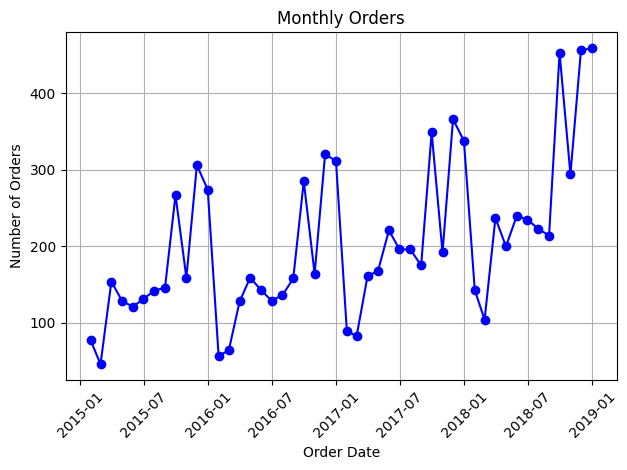

In [23]:
monthly_orders = df.resample('M', on='Order Date')['Order ID'].count()

plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")
plt.title("Monthly Orders")
plt.tight_layout() 
plt.grid()
plt.show()

##### Order rate over 4 years

In [24]:
yearly_orders = df.resample('Y', on='Order Date')['Order ID'].count()
yearly_orders.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\1131175789.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_orders = df.resample('Y', on='Order Date')['Order ID'].count()


Order Date
2015-12-31    1952
2016-12-31    2055
2017-12-31    2534
2018-12-31    3258
Freq: YE-DEC, Name: Order ID, dtype: int64

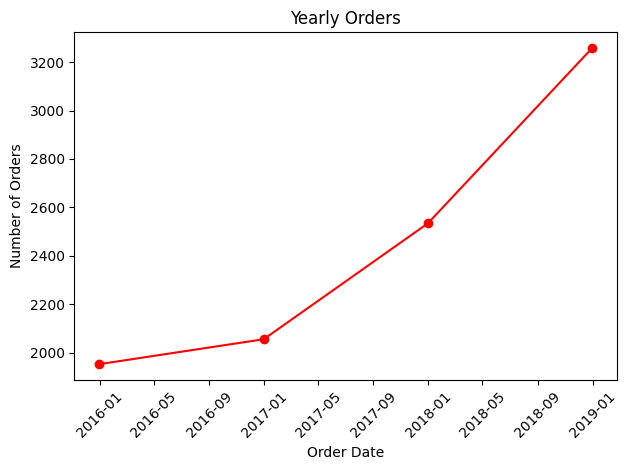

In [25]:
plt.plot(yearly_orders.index, yearly_orders.values, marker='o', linestyle='-', color='red')
plt.xticks(rotation=45)
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")
plt.title("Yearly Orders")
plt.tight_layout() 
plt.show()

##### Order rate over 4 years (Specific)

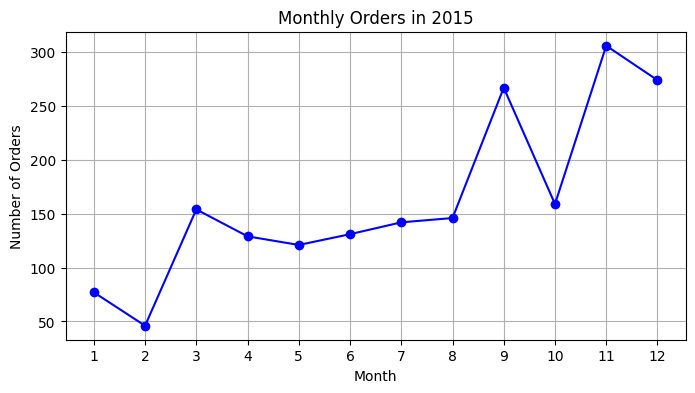

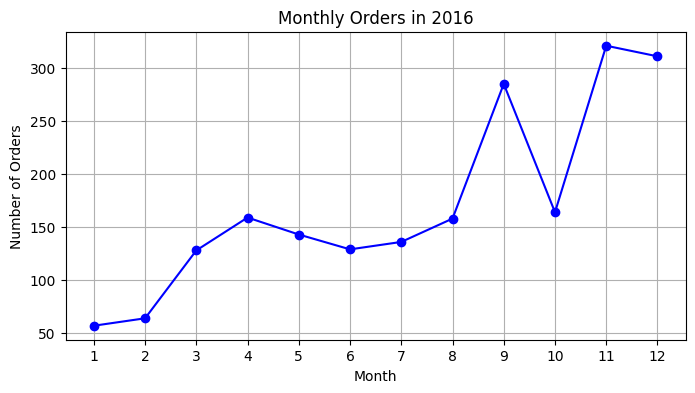

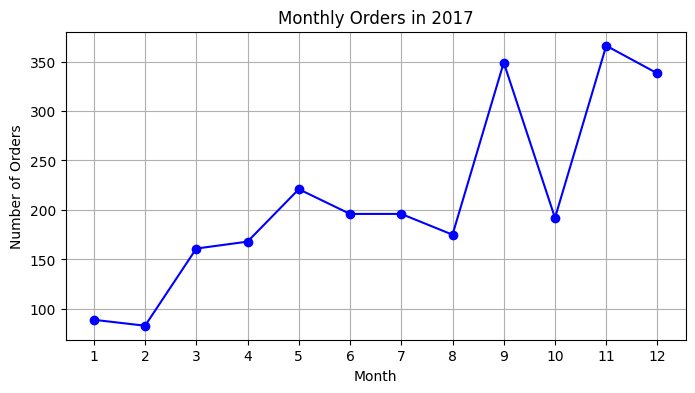

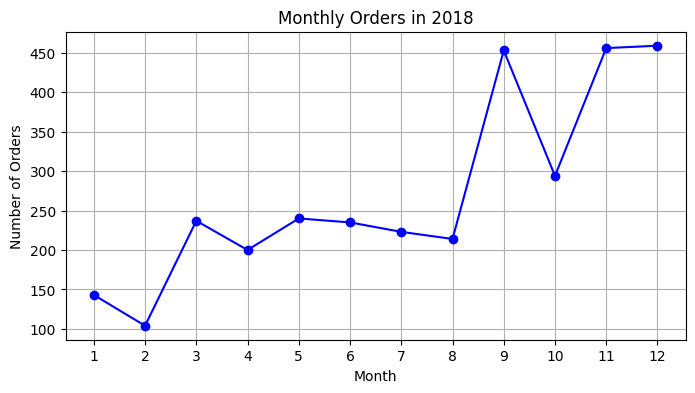

In [26]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

years = np.sort(df['Year'].unique())

for year in years:
    df_year = df[df['Year'] == year]

    monthly_orders = df_year.groupby('Month')['Order ID'].count()

    plt.figure(figsize=(8,4))
    plt.plot(monthly_orders.index, monthly_orders.values, marker='o', linestyle='-', color='blue')
    plt.xticks(monthly_orders.index)
    plt.xlabel("Month")
    plt.ylabel("Number of Orders")
    plt.title(f"Monthly Orders in {year}")
    plt.grid(True)
    plt.show()

##### Check Sales Over 4 years

In [27]:
yearly_sales = df.resample('Y', on='Order Date')['Sales'].sum()
yearly_sales.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\2905150206.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df.resample('Y', on='Order Date')['Sales'].sum()


Order Date
2015-12-31    479574.8361
2016-12-31    459436.0054
2017-12-31    600192.5500
2018-12-31    722052.0192
Freq: YE-DEC, Name: Sales, dtype: float64

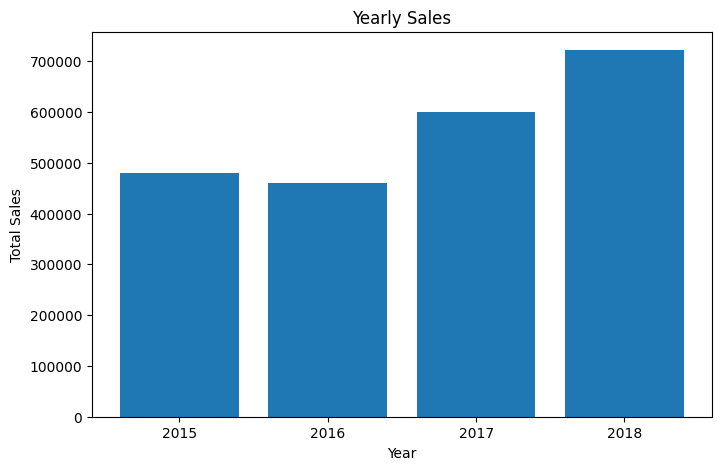

In [28]:
plt.figure(figsize=(8,5))
plt.bar(yearly_sales.index.year, yearly_sales.values)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales")
plt.xticks(yearly_sales.index.year)
plt.show()

#### Top Sales Products

##### Top 10 Products by Sales

In [29]:
data = df.groupby('Product ID')['Sales'].sum()
data.head()

Product ID
FUR-BO-10000112     825.174
FUR-BO-10000330    1064.624
FUR-BO-10000362    2154.348
FUR-BO-10000468     723.842
FUR-BO-10000711     851.760
Name: Sales, dtype: float64

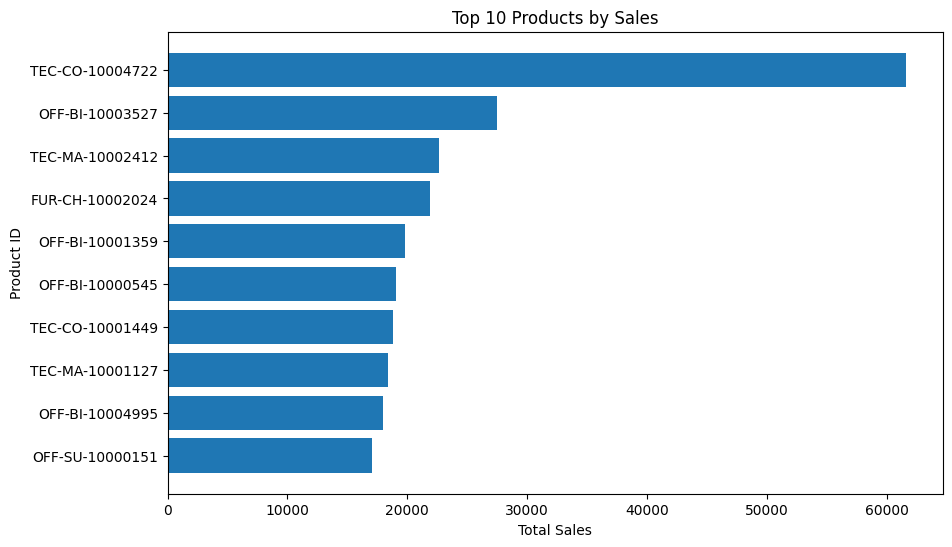

In [30]:
top10 = data.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10.index, top10.values)
plt.xlabel("Total Sales")
plt.ylabel("Product ID")
plt.title("Top 10 Products by Sales")
plt.gca().invert_yaxis()  
plt.show()

##### Down 10 Products by Sales

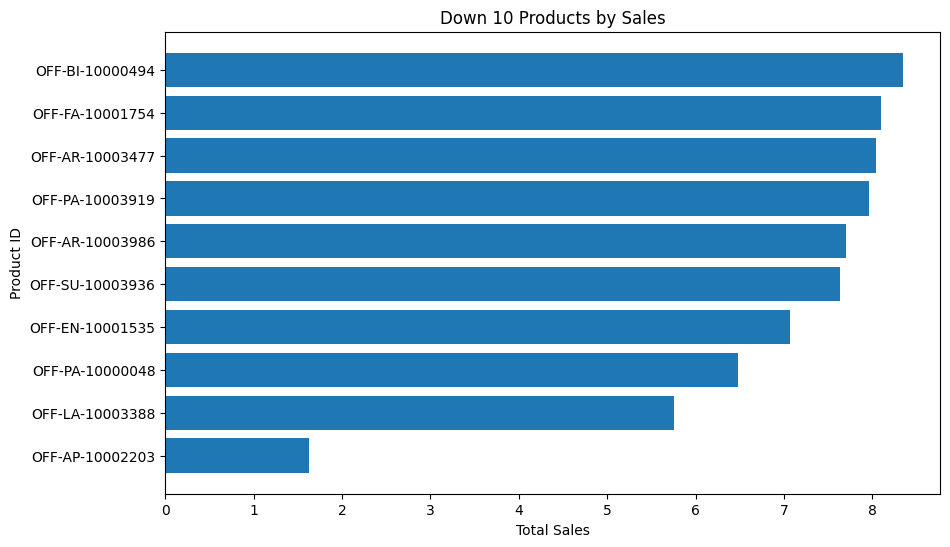

In [31]:
down10 = data.sort_values(ascending=False).tail(10)

plt.figure(figsize=(10,6))
plt.barh(down10.index, down10.values)
plt.xlabel("Total Sales")
plt.ylabel("Product ID")
plt.title("Down 10 Products by Sales")
plt.gca().invert_yaxis()  
plt.show()

##### Top 5 States and their Top 3 Products by Sales

In [32]:
states_counts = df.groupby('State')['Order ID'].count()
top5_states = states_counts.sort_values(ascending=False).head(5).index

top_products = {}
for state in top5_states:
    df_state = df[df['State'] == state]
    top3 = df_state.groupby('Product ID')['Sales'].sum().sort_values(ascending=False).head(3)
    top_products[state] = top3

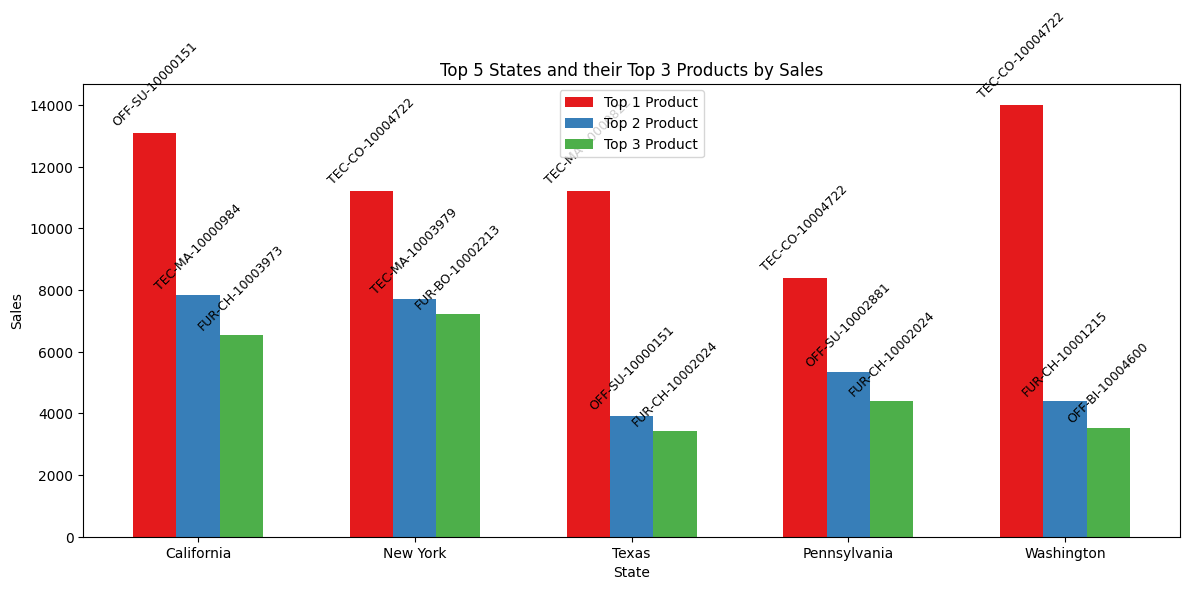

In [33]:
plt.figure(figsize=(12,6))
bar_width = 0.2

colors = [cm.Set1(0), cm.Set1(1), cm.Set1(2)]
states = list(top_products.keys())
x = range(len(states))

for i in range(3):  
    values = [top_products[state].values[i] if i < len(top_products[state]) else 0 for state in states]
    labels = [list(top_products[state].index)[i] if i < len(top_products[state]) else '' for state in states]
    bars = plt.bar([p + i*bar_width for p in x], values, width=bar_width, color=colors[i], label=f'Top {i+1} Product')
    
    for bar, label in zip(bars, labels):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(values), label, 
                 ha='center', va='bottom', fontsize=9, rotation=45)

plt.xticks([p + bar_width for p in x], states)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Top 5 States and their Top 3 Products by Sales")
plt.legend()
plt.tight_layout()
plt.show()

#### Performance by Category

##### Main Categories

In [34]:
data = df['Category'].value_counts()
data

Category
Office Supplies    5909
Furniture          2077
Technology         1813
Name: count, dtype: int64

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\2844161224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="Set1")


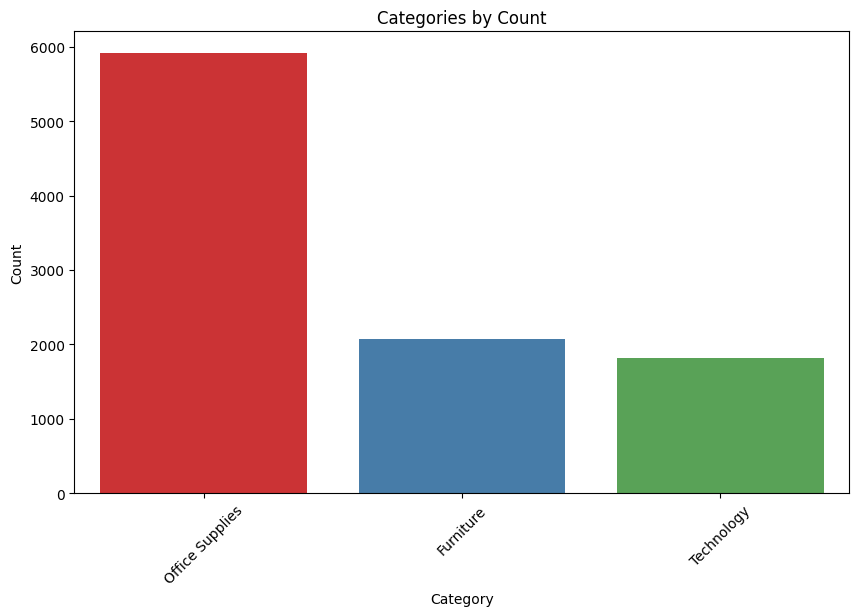

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.index, y=data.values, palette="Set1")  
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Categories by Count")
plt.xticks(rotation=45)  
plt.show()

##### Sub Categories

In [36]:
categories_counts = df.groupby('Category')['Order ID'].count()

top_subcategories = {}

for category in categories_counts.index:
    df_cat = df[df['Category'] == category]
    top3 = df_cat.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(3)
    top_subcategories[category] = top3

for category, subcat in top_subcategories.items():
    print(f"Category: {category}")
    print(subcat)
    print("-"*30)

Category: Furniture
Sub-Category
Chairs       322541.3590
Tables       202810.6280
Bookcases    113813.1987
Name: Sales, dtype: float64
------------------------------
Category: Office Supplies
Sub-Category
Storage       219343.392
Binders       200028.785
Appliances    104618.403
Name: Sales, dtype: float64
------------------------------
Category: Technology
Sub-Category
Phones         327782.448
Machines       189238.631
Accessories    164186.700
Name: Sales, dtype: float64
------------------------------


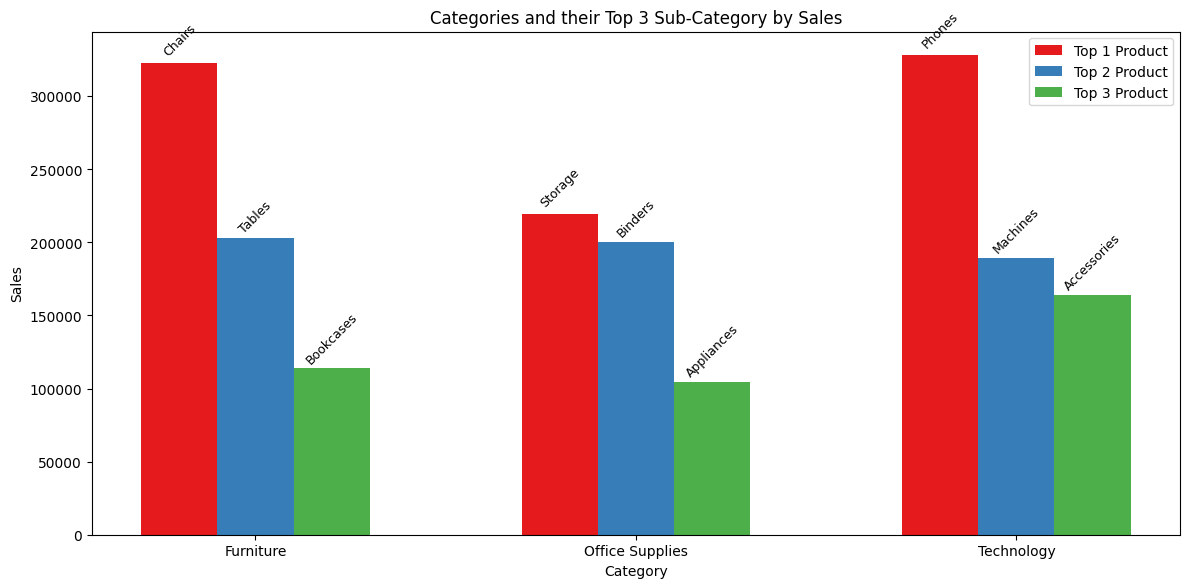

In [37]:
plt.figure(figsize=(12,6))
bar_width = 0.2

colors = [cm.Set1(0), cm.Set1(1), cm.Set1(2)]
categories = list(top_subcategories.keys())
x = range(len(categories))

for i in range(3):  
    values = [top_subcategories[category].values[i] if i < len(top_subcategories[category]) else 0 for category in categories]
    labels = [list(top_subcategories[category].index)[i] if i < len(top_subcategories[category]) else '' for category in categories]
    bars = plt.bar([p + i*bar_width for p in x], values, width=bar_width, color=colors[i], label=f'Top {i+1} Product')
    
    for bar, label in zip(bars, labels):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(values), label, 
                 ha='center', va='bottom', fontsize=9, rotation=45)

plt.xticks([p + bar_width for p in x], categories)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Categories and their Top 3 Sub-Category by Sales")
plt.legend()
plt.tight_layout()
plt.show()

#### Check Shipping

##### Distribution of Shipping Days

In [38]:
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
data = df['Shipping Days'].value_counts().sort_index()

data

Shipping Days
0     514
1     363
2    1295
3     978
4    2717
5    2147
6    1170
7     615
Name: count, dtype: int64

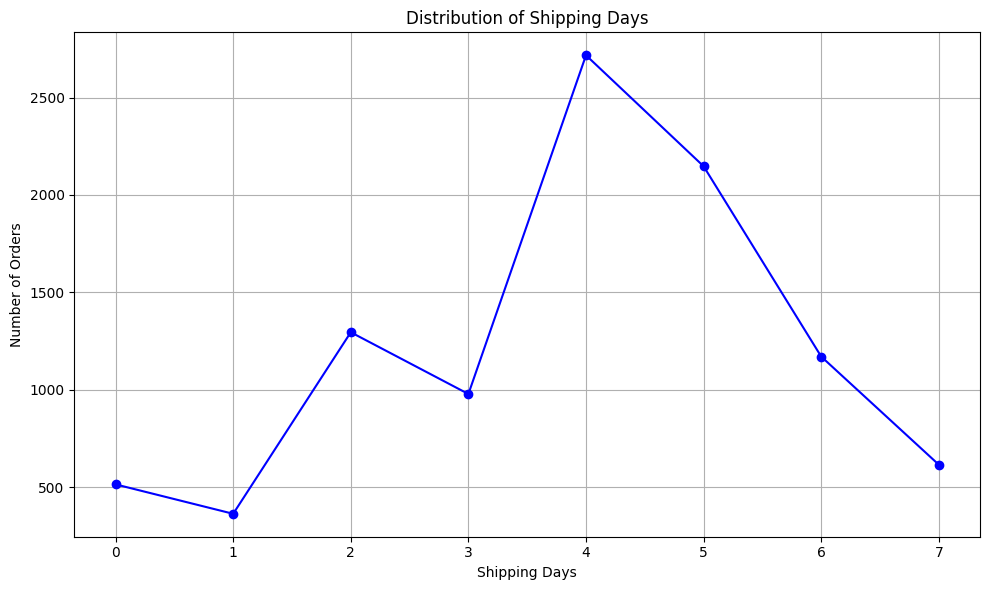

In [39]:
plt.figure(figsize=(10,6))
plt.plot(data.keys(), data.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Shipping Days")
plt.ylabel("Number of Orders")
plt.title("Distribution of Shipping Days")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Distribution of Ship Mode

In [40]:
data = df['Ship Mode'].value_counts()
data

Ship Mode
Standard Class    5858
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\864976873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="Set1")


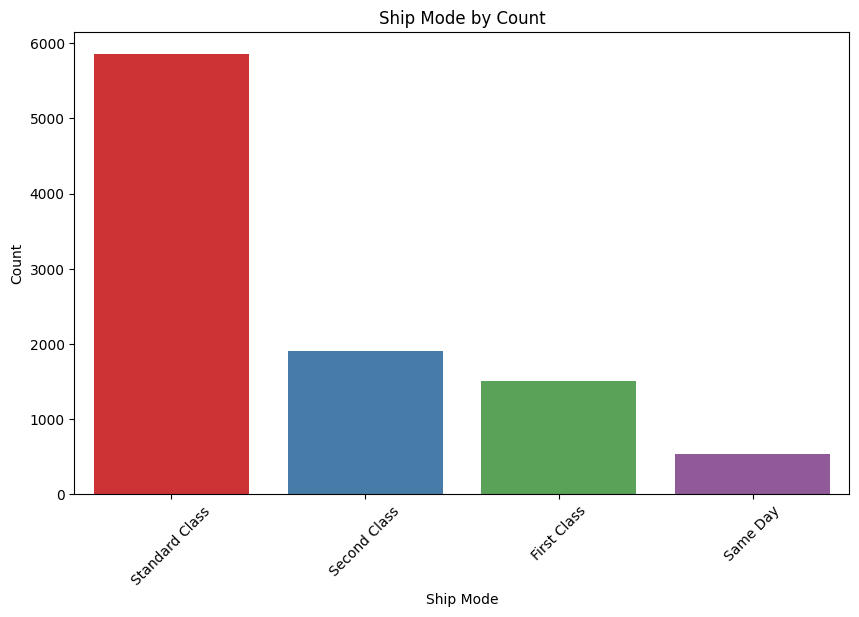

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.index, y=data.values, palette="Set1")  
plt.xlabel("Ship Mode")
plt.ylabel("Count")
plt.title("Ship Mode by Count")
plt.xticks(rotation=45)  
plt.show()

#### Customer Analysis

##### Top 5 Customers

In [42]:
top_customers = df.groupby('Customer ID')['Sales'].sum()
data = top_customers.sort_values().tail(5)

C:\Users\moham\AppData\Local\Temp\ipykernel_14144\923210070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="Set1")


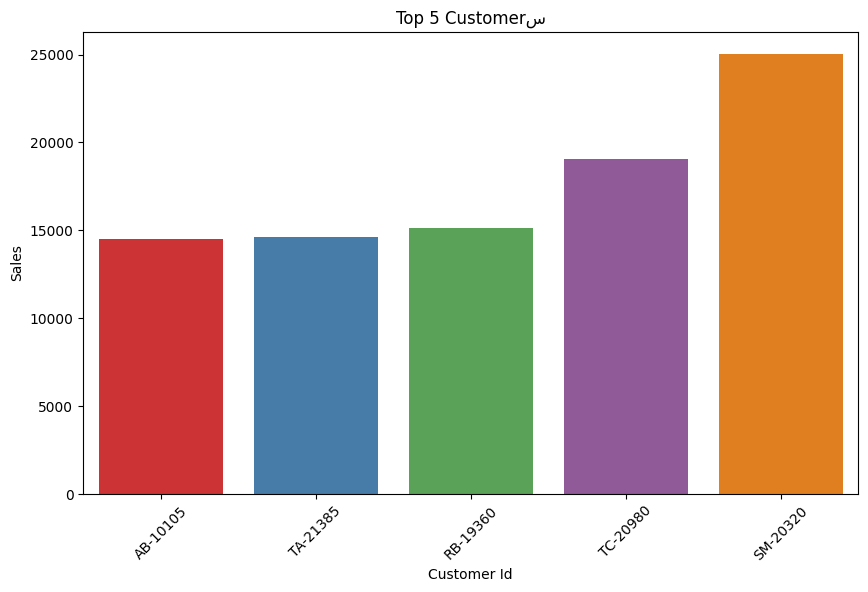

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.index, y=data.values, palette="Set1")  
plt.xlabel("Customer Id")
plt.ylabel("Sales")
plt.title("Top 5 Customerس")
plt.xticks(rotation=45)  
plt.show()

##### Distribution of Segments

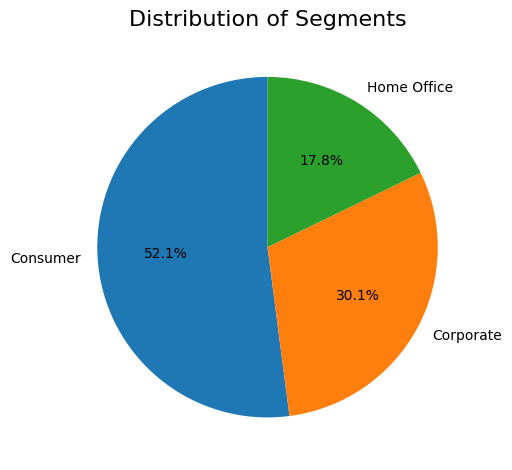

In [44]:
data = df['Segment'].value_counts()

plt.pie(
    x=data.values,
    labels=data.index,
    autopct='%1.1f%%',       
    startangle=90
)
plt.title("Distribution of Segments", fontsize=16)
plt.tight_layout()
plt.show()

## Thank You 🎀🫶🏻💌